In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DatasetA.csv')


In [3]:
df.head()

,customer_id,Age,Occupation,Location,Status,Income,Car Segment,Car_Type,Flag_Customer_NPL
0,1100000001,21,Self Employee,Central,Single,13710,SUV,New Car,0
1,1100000002,44,Self Employee,North,Single,94864,SUV,Used Car,0
2,1100000003,23,Farmer,Central,Single,11231,Luxury,Used Car,0
3,1100000004,25,Self Employee,Central,Single,16547,Eco Car,New Car,0
4,1100000005,35,Self Employee,North-east,Single,28193,SUV,Used Car,1


In [4]:
df.isna().sum()

customer_id          0
Age                  0
Occupation           0
Location             0
Status               0
Income               0
Car Segment          0
Car_Type             0
Flag_Customer_NPL    0
dtype: int64

In [5]:
df['customer_id'].duplicated().sum()

0

In [6]:
df.drop('customer_id',axis=1, inplace=True)

In [7]:
df.dtypes

Age                   int64
Occupation           object
Location             object
Status               object
Income                int64
Car Segment          object
Car_Type             object
Flag_Customer_NPL     int64
dtype: object

In [8]:
df['Flag_Customer_NPL'] = df['Flag_Customer_NPL'].astype('object')

<Axes: ylabel='Flag_Customer_NPL'>

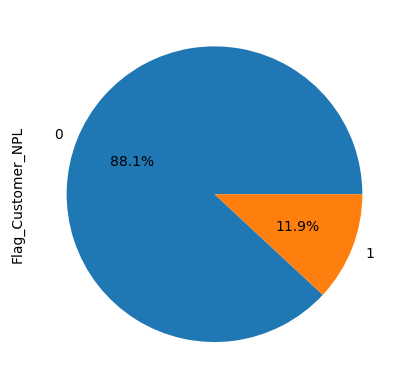

In [9]:
df['Flag_Customer_NPL'].value_counts().plot.pie(autopct='%1.1f%%')

In [10]:
num_feats = df.select_dtypes('int64').columns.to_list()
cat_feats = df.select_dtypes('object').columns.to_list()

In [19]:
num_feats

['Age', 'Income']

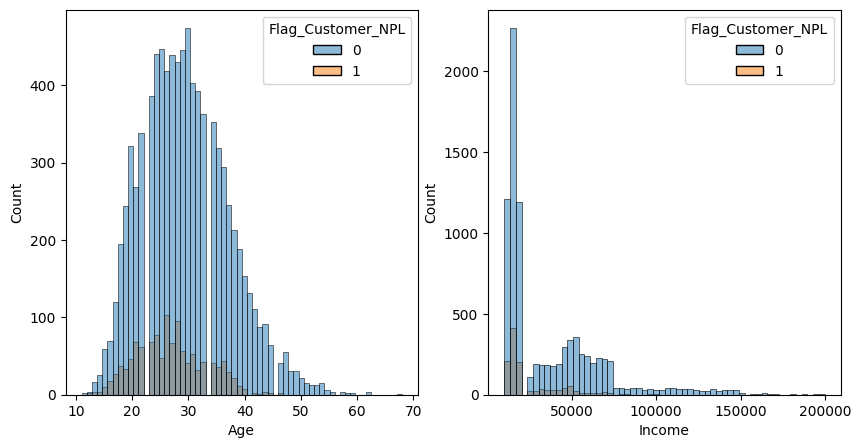

In [25]:
col = 1
plt.figure(figsize = (10, 5))
for i in num_feats:
    plt.subplot(1, 2, col)
    sns.histplot(data=df, x=i, hue='Flag_Customer_NPL')
    plt.xlabel(i)
    col = col + 1

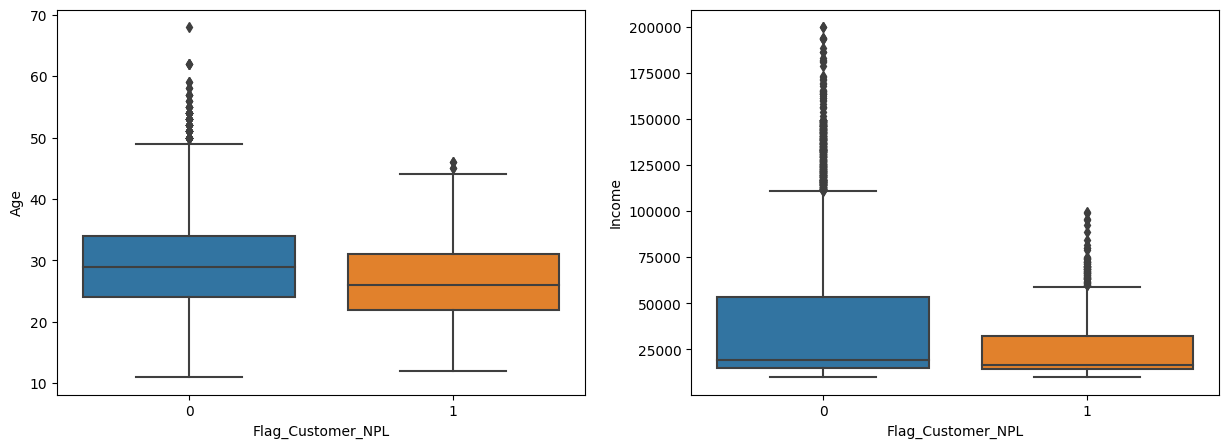

In [29]:
col = 1
plt.figure(figsize = (15, 5))
for i in num_feats:
    plt.subplot(1, 2, col)
    sns.boxplot(data=df, x='Flag_Customer_NPL', y=i)
    col = col + 1

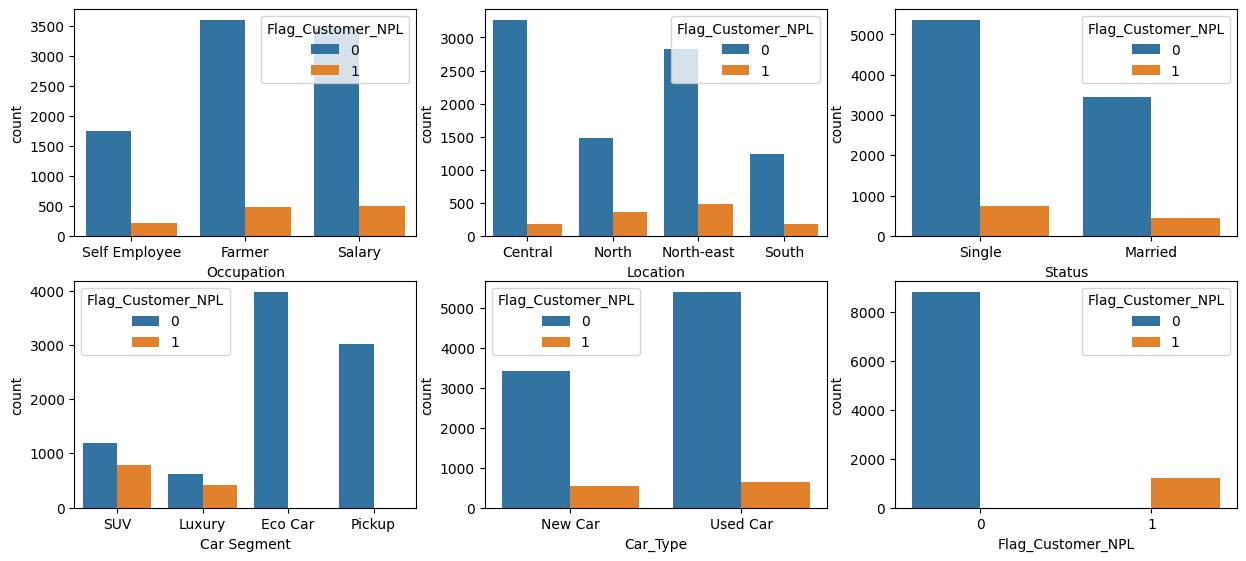

In [ ]:
col = 1
plt.figure(figsize = (15, 10))
for i in cat_feats:
    plt.subplot(3, 3, col)
    sns.countplot(data=df, x=i, hue='Flag_Customer_NPL')
    plt.xlabel(i)
    col = col + 1

In [32]:
cat_feats

['Occupation',
 'Location',
 'Status',
 'Car Segment',
 'Car_Type',
 'Flag_Customer_NPL']

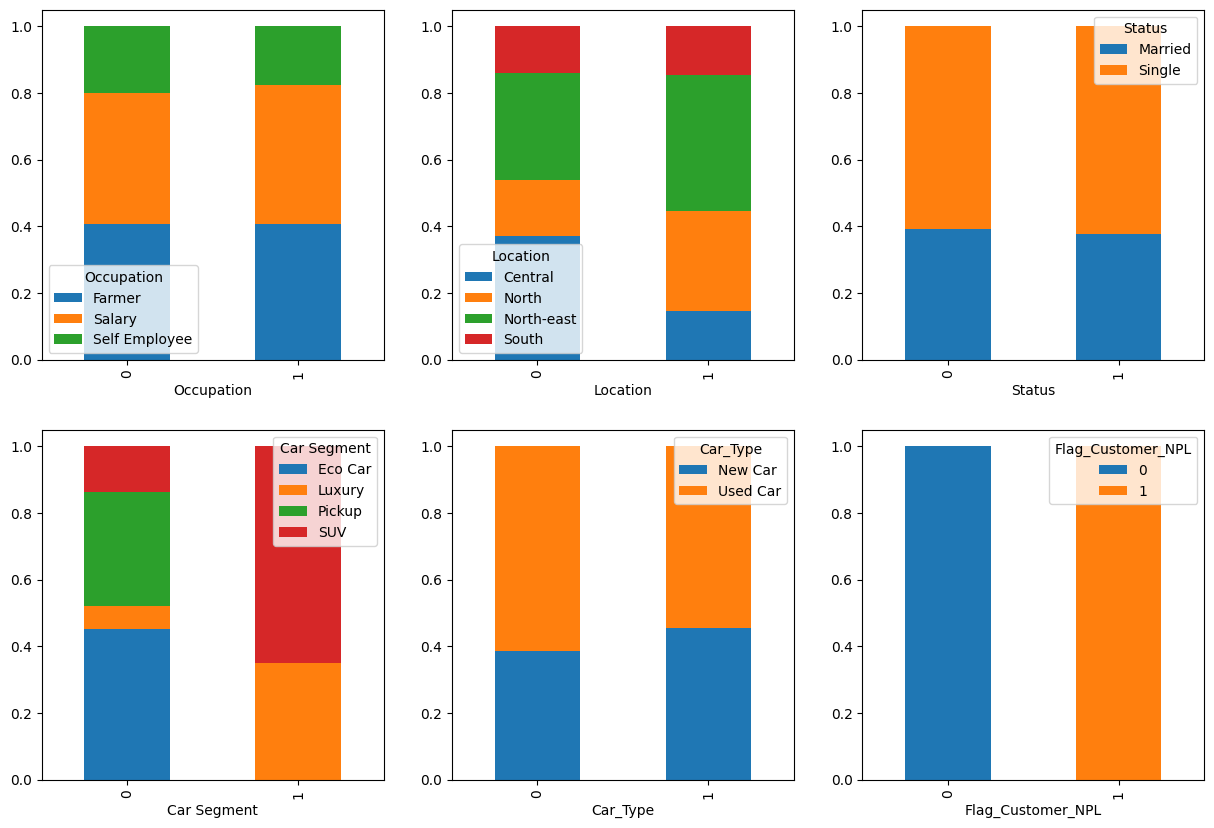

In [92]:
col = 1
plt.figure(figsize = (15,10))
for i in cat_feats:
    ax = plt.subplot(2,3,col)
    counts_df = df.groupby([i, 'Flag_Customer_NPL'])['Flag_Customer_NPL'].count().unstack()
    percents_df = counts_df.div(counts_df.sum()).T
    percents_df.plot(kind="bar", stacked=True, ax=ax)
    plt.xlabel(i)
    col = col + 1